In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
marcas=pd.read_csv("marcas.csv")

In [110]:
marcas.head()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,2,4,8,8,2,9,7,4,6,a
1,1,1,4,7,1,1,1,2,2,a
2,2,3,5,9,2,9,5,1,6,a
3,1,6,10,8,3,4,5,2,1,a
4,1,1,5,8,1,9,9,1,1,a


In [111]:
marcas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   perform  1000 non-null   int64 
 1   leader   1000 non-null   int64 
 2   latest   1000 non-null   int64 
 3   fun      1000 non-null   int64 
 4   serious  1000 non-null   int64 
 5   bargain  1000 non-null   int64 
 6   value    1000 non-null   int64 
 7   trendy   1000 non-null   int64 
 8   rebuy    1000 non-null   int64 
 9   brand    1000 non-null   object
dtypes: int64(9), object(1)
memory usage: 78.2+ KB


In [112]:
marcas.describe()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,4.488000,4.417000,6.195000,6.06800,4.323000,4.259000,4.33700,5.220000,3.727000
std,3.203454,2.608432,3.078059,2.74425,2.778199,2.667027,2.39858,2.742101,2.544592
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,1.000000,2.000000,4.000000,4.00000,2.000000,2.000000,2.00000,3.000000,1.000000
50%,4.000000,4.000000,7.000000,6.00000,4.000000,4.000000,4.00000,5.000000,3.000000
75%,7.000000,6.000000,9.000000,8.00000,6.000000,6.000000,6.00000,7.000000,5.000000
max,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000


In [113]:
marcas.corr()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
perform,1.000000,0.500202,-0.122446,-0.256332,0.359172,0.057129,0.101946,0.008733,0.306659
leader,0.500202,1.000000,0.026890,-0.290358,0.571215,0.033094,0.118310,0.066512,0.208700
latest,-0.122446,0.026890,1.000000,0.245154,0.009952,-0.254419,-0.342714,0.627628,-0.397180
fun,-0.256332,-0.290358,0.245154,1.000000,-0.281097,-0.066553,-0.145218,0.127974,-0.237161
serious,0.359172,0.571215,0.009952,-0.281097,1.000000,-0.002656,0.023757,0.121009,0.180703
bargain,0.057129,0.033094,-0.254419,-0.066553,-0.002656,1.000000,0.739627,-0.350534,0.467381
value,0.101946,0.118310,-0.342714,-0.145218,0.023757,0.739627,1.000000,-0.434535,0.505962
trendy,0.008733,0.066512,0.627628,0.127974,0.121009,-0.350534,-0.434535,1.000000,-0.298246
rebuy,0.306659,0.208700,-0.397180,-0.237161,0.180703,0.467381,0.505962,-0.298246,1.000000


In [114]:
attributes=marcas.set_index("brand")

In [115]:
attributes

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
brand,,,,,,,,,
a,2,4,8,8,2,9,7,4,6
a,1,1,4,7,1,1,1,2,2
a,2,3,5,9,2,9,5,1,6
a,1,6,10,8,3,4,5,2,1
a,1,1,5,8,1,9,9,1,1
...,...,...,...,...,...,...,...,...,...
j,2,2,3,6,4,8,5,1,2
j,3,2,6,7,1,3,3,2,1
j,1,1,10,10,1,6,5,5,2


In [116]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_model = calculate_kmo(attributes)
print(kmo_model)#OUTPUT
kmom=pd.Series(kmo_model)

(array([0.74381642, 0.64888674, 0.65870979, 0.8373417 , 0.6984456 ,
       0.6774691 , 0.69882413, 0.6956128 , 0.84275807]), 0.7111455589936453)


In [117]:
from factor_analyzer.factor_analyzer import FactorAnalyzer 
fa = FactorAnalyzer(rotation='varimax',n_factors=3)
fa.fit(attributes)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev>1

array([ True,  True,  True, False, False, False, False, False, False])

In [118]:
total_sum = sum(ev)
variance_explained = [(i / total_sum) * 100 for i in ev]
variance_explained[0:3]

[33.103284020098975, 23.2950186205603, 11.991720827913909]

In [120]:
load=pd.DataFrame(fa.loadings_, columns=["Factor1", "Factor2", "Factor3"], index=[attributes.columns])
load

,Factor1,Factor2,Factor3
perform,0.072125,0.604384,-0.063490
leader,0.064854,0.803356,0.099235
latest,-0.161503,-0.080764,0.978363
fun,-0.070272,-0.405059,0.214718
serious,-0.007105,0.676081,0.077347
bargain,0.842325,-0.004879,-0.114634
value,0.853382,0.077487,-0.211631
trendy,-0.347362,0.080572,0.585935
rebuy,0.499724,0.315555,-0.295356


In [121]:
#Factor 1 : affordable
#Factor 2 : resolute
#Factor 3 : contemporary

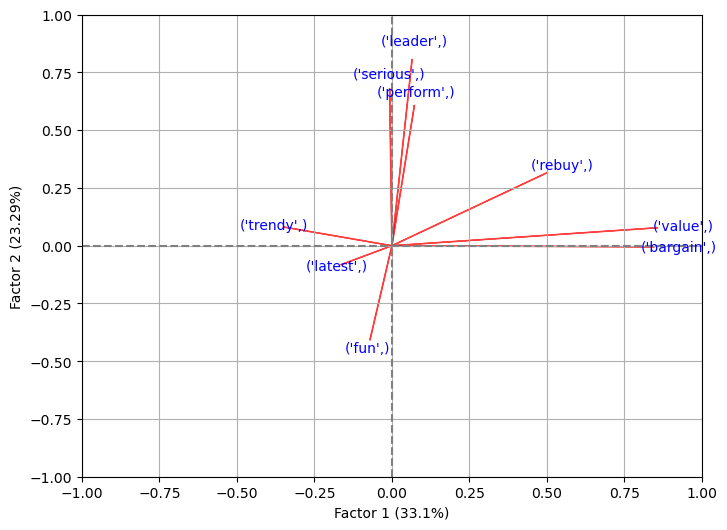

In [173]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the variables' correlation with factors as arrows
for variable in load.index:
    ax.arrow(0, 0, load.loc[variable, 'Factor1'], load.loc[variable, 'Factor2'], color='r', alpha=0.7)
    ax.text(load.loc[variable, 'Factor1'] * 1.1, load.loc[variable, 'Factor2'] * 1.1, variable, color='b', ha='center', va='center')

# Set the limits and labels for the plot
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('Factor 1 (33.1%)')
ax.set_ylabel('Factor 2 (23.29%)')
ax.axhline(0, color='gray', linestyle='--')
ax.axvline(0, color='gray', linestyle='--')

# Display the plot
plt.grid(True)
plt.show()


In [122]:
factor_scores = fa.transform(attributes)
attributes[["affordable", "resolute", "fashionable"]]=factor_scores[:, 0:4]  # Extract the scores for the first factor

In [123]:
attributes.head()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,affordable,resolute,fashionable
brand,,,,,,,,,,,,
a,2,4,8,8,2,9,7,4,6,1.620472,-0.642379,0.809139
a,1,1,4,7,1,1,1,2,2,-1.363634,-1.213733,-1.035917
a,2,3,5,9,2,9,5,1,6,1.058237,-0.863308,-0.241973
a,1,6,10,8,3,4,5,2,1,0.316772,-0.402401,1.247174
a,1,1,5,8,1,9,9,1,1,1.762382,-1.637399,-0.249227


_________________________________________________________________

MULTIDIMENSIONAL SCALING (MDS)

In [124]:
import pandas as pd
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances

In [125]:
brands=attributes.groupby("brand").mean()

In [126]:
brands.columns

Index(['perform', 'leader', 'latest', 'fun', 'serious', 'bargain', 'value',
       'trendy', 'rebuy', 'affordable', 'resolute', 'fashionable'],
      dtype='object')

In [127]:
brands1=brands[['affordable', 'resolute', 'fashionable']]

In [128]:
brands1

,affordable,resolute,fashionable
brand,,,
a,0.276995,-0.903352,0.379260
b,0.182044,1.154964,0.852936
c,-0.585988,1.168063,-0.100689
d,-0.877610,-0.576038,0.158763
e,0.542540,-0.098440,0.544396
f,0.823651,0.406096,-1.100124
g,1.022851,0.074192,-1.149040
h,-0.731589,-0.241407,0.377304
i,-0.500793,-0.149640,0.286567


In [129]:
brand_names=pd.Series(brands1.index)

In [130]:
brand_names

0    a
1    b
2    c
3    d
4    e
5    f
6    g
7    h
8    i
9    j
Name: brand, dtype: object

In [131]:
#Calculate Dissimilarity Matrix
dissimilarity_matrix = pairwise_distances(brands1, metric='euclidean')  

In [132]:
#Perform Multidimensional Scaling (MDS)
mds = MDS(n_components=2, dissimilarity='precomputed')  
# Set the desired number of components and use the precomputed dissimilarity matrix
mds_coordinates = mds.fit_transform(dissimilarity_matrix)

In [133]:
#Analyze or Visualize the MDS Results
mds_df = pd.DataFrame(mds_coordinates, columns=['MDS1', 'MDS2'])
print(mds_df)

       MDS1      MDS2
0 -0.554834  0.927832
1  0.568316 -1.293202
2 -0.113792 -1.330379
3 -1.097083  0.088116
4  0.197621  0.124205
5  1.419283  0.347986
6  1.387781  0.733189
7 -0.852694 -0.194042
8 -0.602140 -0.150829
9 -0.352459  0.747124


In [134]:
mds_df=pd.concat([mds_df, brand_names], axis=1)

In [135]:
mds_df

,MDS1,MDS2,brand
0,-0.554834,0.927832,a
1,0.568316,-1.293202,b
2,-0.113792,-1.330379,c
3,-1.097083,0.088116,d
4,0.197621,0.124205,e
5,1.419283,0.347986,f
6,1.387781,0.733189,g
7,-0.852694,-0.194042,h
8,-0.602140,-0.150829,i
9,-0.352459,0.747124,j


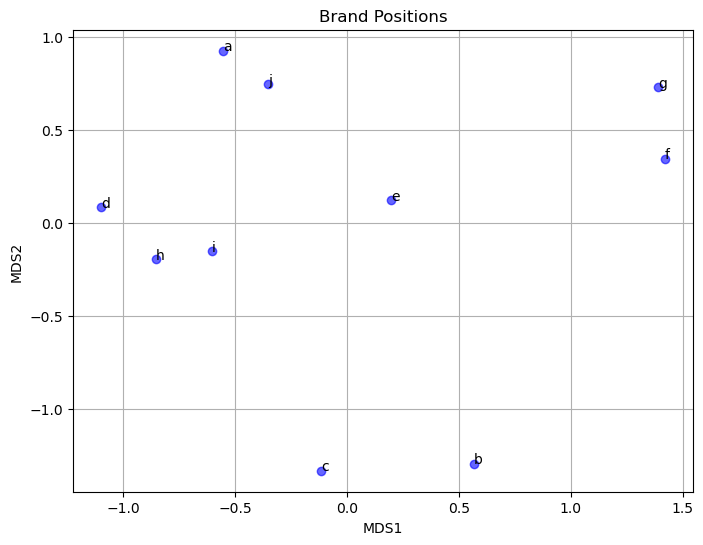

In [136]:
plt.figure(figsize=(8, 6))
plt.scatter(mds_df['MDS1'], mds_df['MDS2'], c='b', alpha=0.6)
for i, brand in enumerate(mds_df['brand']):
    plt.annotate(brand, (mds_df['MDS1'].iloc[i], mds_df['MDS2'].iloc[i]))
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.title('Brand Positions')
plt.grid(True)
plt.show()

<AxesSubplot:ylabel='brand'>

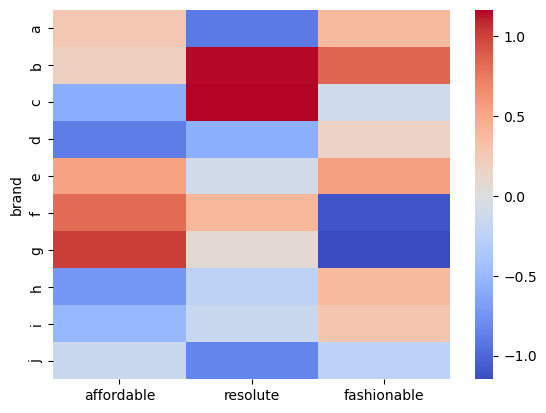

In [82]:
sns.heatmap(brands1,cmap='coolwarm')

In [ ]:
# g and f are affordable and negatively correlated with fashionable; they percieved quite similarly
# a and j are negatively correlated with resolute; 
# b and c are resolute; serious, leader, maybe business and high-end; also similarly percieved
# d is affordable
# i and h are somewhat affordable and not so fashionable; like g and f but the overall opinion is not that strong;
# e is not well defined; doesn't stand out with any quality

-------------------------------------------------------------------------

CORRESPONDENCE ANALYSIS (CA)

In [141]:
brandca=marcas.set_index("brand")

In [154]:
aux=brandca>5

In [156]:
conting=brandca.groupby(brandca.index).sum()

In [157]:
conting

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
brand,,,,,,,,,
a,165,304,746,787,177,483,478,378,221
b,747,721,843,340,761,437,470,725,433
c,657,745,588,375,772,264,328,529,339
d,231,287,728,658,240,191,210,724,247
e,268,492,760,688,444,573,534,560,382
f,430,512,231,547,596,659,679,299,718
g,743,398,224,465,284,665,735,172,719
h,444,364,774,803,393,229,246,759,219
i,556,358,729,720,391,358,241,684,321


In [159]:
from prince import CA

In [160]:
ca = CA(n_components=2)
ca.fit(conting)

In [161]:
#Obtain the row and column coordinates
row_coordinates = ca.row_coordinates(conting)
column_coordinates = ca.column_coordinates(conting)

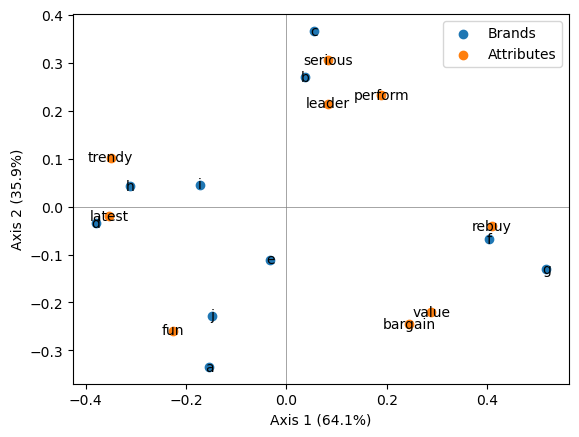

In [171]:
#Correspondence Plot
plt.scatter(row_coordinates.iloc[:, 0], row_coordinates.iloc[:, 1], label='Brands')
plt.scatter(column_coordinates.iloc[:, 0], column_coordinates.iloc[:, 1], label='Attributes')

for i, txt in enumerate(conting.index):
    plt.annotate(txt, (row_coordinates.iloc[i, 0], row_coordinates.iloc[i, 1]), ha='center', va='center')
for i, txt in enumerate(conting.columns):
    plt.annotate(txt, (column_coordinates.iloc[i, 0], column_coordinates.iloc[i, 1]), ha='center', va='center')

plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.xlabel('Axis 1 (64.1%)')
plt.ylabel('Axis 2 (35.9%)')
plt.legend()

plt.show()


In [ ]:
#In comparison to the MDS (bearing in mind that our contingency table is considering that a person evaluates a certain
#brand with the respective attribute if the grade on the scale from 1-10 is more than 5, so results might differ) we 
#can see again that brands b and c are strongly viewed as serious and leading and also that those attribute strongly
#define the x-axis, they disscriminate well and brands b and c are differenciated from the rest. The y-axis opposes
#serious vs fun brands; Fun discriminates well and brands like j and a are associated with this attribute.
#the x-axis are fashionable and trendy vs affordable. We can also see that h is percieved as trendy and latest and brand
#d is stronlgy associated with latest. Similarly, the attributes being far from the origin, they define the x-axis
#and are good attributes to discriminate between brands. The same goes for the brand f and the attribute rebuy (we can consider
#g as potential concurrence to f associated with the same attribute). 

#Finally, considering this as a complimnet of the MDS, we can see that the brands g and f are not seen so much as affordable
#but as a rebuy, so it means good quality for the price; they are not so related with value and bargain; That could
#be a potential niche for unexplored business (like Shein started to explore this and blew up). Brand e is a problematic
#one because as seen in the MDS it does not stand out with anything - it is close to the origin and far away from any attribute.

In [167]:
eig=ca.eigenvalues_

In [169]:
eig[0]/sum(eig) #va

0.6409811413005451

In [170]:
eig[1]/sum(eig)

0.35901885869945493